<a href="https://colab.research.google.com/github/dkbean/Improved-stability-of-WGAN-GP/blob/main/3.%20WGAN-GP%20Anime(critic's%20lr%3D%200.000075).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir generator

In [ ]:
#Create folders to save 3000 generated images for each n epochs
import os
import subprocess

n=10
# Specify the base folder where you want to create the subfolders
base_folder = ""  # Replace with your desired base folder path


# Create 15 folders with the specified naming pattern
for x in range(0, 801, n):
    folder_name = f'animeGenerated_wgan_{x}epochs'
    folder_path = os.path.join(base_folder, folder_name)

    try:
        os.makedirs(folder_path)
        print(f"Created folder: {folder_path}")
    except FileExistsError:
        print(f"Folder already exists: {folder_path}")

print("Folders created successfully.")

Created folder: animeGenerated_wgan_0epochs
Created folder: animeGenerated_wgan_10epochs
Created folder: animeGenerated_wgan_20epochs
Created folder: animeGenerated_wgan_30epochs
Created folder: animeGenerated_wgan_40epochs
Created folder: animeGenerated_wgan_50epochs
Created folder: animeGenerated_wgan_60epochs
Created folder: animeGenerated_wgan_70epochs
Created folder: animeGenerated_wgan_80epochs
Created folder: animeGenerated_wgan_90epochs
Created folder: animeGenerated_wgan_100epochs
Created folder: animeGenerated_wgan_110epochs
Created folder: animeGenerated_wgan_120epochs
Created folder: animeGenerated_wgan_130epochs
Created folder: animeGenerated_wgan_140epochs
Created folder: animeGenerated_wgan_150epochs
Created folder: animeGenerated_wgan_160epochs
Created folder: animeGenerated_wgan_170epochs
Created folder: animeGenerated_wgan_180epochs
Created folder: animeGenerated_wgan_190epochs
Created folder: animeGenerated_wgan_200epochs
Created folder: animeGenerated_wgan_210epochs

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pytorch-fid

In [ ]:
# !pip uninstall tensorflow -y
#

In [ ]:
# !pip install  tensorflow==2.14.0

In [ ]:
!unzip /content/drive/MyDrive/anime_test.zip -d ./

Archive:  /content/drive/MyDrive/anime_test.zip
   creating: ./anime_test/
  inflating: ./anime_test/anime_3001.jpg  
  inflating: ./anime_test/anime_3002.jpg  
  inflating: ./anime_test/anime_3003.jpg  
  inflating: ./anime_test/anime_3004.jpg  
  inflating: ./anime_test/anime_3005.jpg  
  inflating: ./anime_test/anime_3006.jpg  
  inflating: ./anime_test/anime_3007.jpg  
  inflating: ./anime_test/anime_3008.jpg  
  inflating: ./anime_test/anime_3009.jpg  
  inflating: ./anime_test/anime_3010.jpg  
  inflating: ./anime_test/anime_3011.jpg  
  inflating: ./anime_test/anime_3012.jpg  
  inflating: ./anime_test/anime_3013.jpg  
  inflating: ./anime_test/anime_3014.jpg  
  inflating: ./anime_test/anime_3015.jpg  
  inflating: ./anime_test/anime_3016.jpg  
  inflating: ./anime_test/anime_3017.jpg  
  inflating: ./anime_test/anime_3018.jpg  
  inflating: ./anime_test/anime_3019.jpg  
  inflating: ./anime_test/anime_3020.jpg  
  inflating: ./anime_test/anime_3021.jpg  
  inflating: ./anime_t

In [ ]:
!unzip /content/drive/MyDrive/anime_train.zip -d ./

Streaming output truncated to the last 5000 lines.
  inflating: ./anime_train/anime_60006.jpg  
  inflating: ./anime_train/anime_60007.jpg  
  inflating: ./anime_train/anime_60008.jpg  
  inflating: ./anime_train/anime_60009.jpg  
  inflating: ./anime_train/anime_6001.jpg  
  inflating: ./anime_train/anime_60010.jpg  
  inflating: ./anime_train/anime_60011.jpg  
  inflating: ./anime_train/anime_60012.jpg  
  inflating: ./anime_train/anime_60013.jpg  
  inflating: ./anime_train/anime_60014.jpg  
  inflating: ./anime_train/anime_60015.jpg  
  inflating: ./anime_train/anime_60016.jpg  
  inflating: ./anime_train/anime_60017.jpg  
  inflating: ./anime_train/anime_60018.jpg  
  inflating: ./anime_train/anime_60019.jpg  
  inflating: ./anime_train/anime_6002.jpg  
  inflating: ./anime_train/anime_60020.jpg  
  inflating: ./anime_train/anime_60021.jpg  
  inflating: ./anime_train/anime_60022.jpg  
  inflating: ./anime_train/anime_60023.jpg  
  inflating: ./anime_train/anime_60024.jpg  
  infl

In [ ]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

from matplotlib import pyplot as plt
import numpy as np

import os

In [ ]:
! pwd


/content


In [ ]:
print(tf.version.VERSION)

2.15.0


In [ ]:
anime_data_dir = "/content/anime_train"

In [ ]:
FID_scores = []
def lastWord(string): # get the FID score from the FID command's result

    # split by space and converting
    # string to list and
    lis = list(string.split(" "))

    # length of list
    length = len(lis)

    # returning last element in list
    return lis[length-1]

In [ ]:
train_images = tf.keras.utils.image_dataset_from_directory(
    anime_data_dir, label_mode=None, image_size=(64, 64), batch_size=256 # Margaret: increase batch size from 32
)

Found 60565 files belonging to 1 classes.


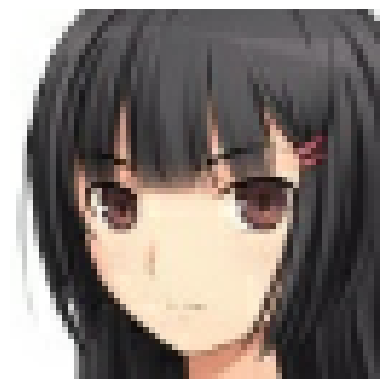

In [ ]:
image_batch = next(iter(train_images))
random_index = np.random.choice(image_batch.shape[0])
random_image = image_batch[random_index].numpy().astype("int32")

# Visualize 1 random image from the training dataset
plt.axis("off")
plt.imshow(random_image)
plt.show()

In [ ]:
def show(images):
    plt.figure(figsize=(4, 4))

    for i in range(16):
        plt.subplot(4, 4, i+1)
        img = keras.utils.array_to_img(images[i])
        plt.imshow(img)
        plt.axis('off')
    plt.show()

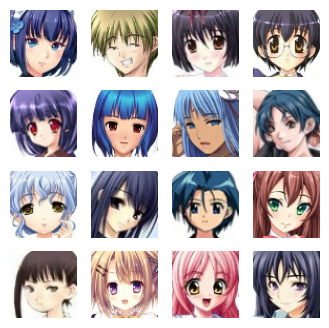

In [ ]:
# Visualize 16 images from the training dataset
show(image_batch[:16])

In [ ]:
# Normalize the images to [-1, 1] which is the range of the tanh activation
train_images = train_images.map(lambda x: (x - 127.5) / 127.5)

In [ ]:
# latent dimension of the random noise
LATENT_DIM = 128
# weight initializer for G per DCGAN paper
WEIGHT_INIT = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.02)
# number of channels, 1 for gray scale and 3 for color images
CHANNELS = 3

In [ ]:
def build_generator():
    # create a Keras Sequential model
    model = Sequential(name="generator")

    # prepare for reshape: FC => BN => RN layers, note: input shape defined in the 1st Dense layer
    model.add(layers.Dense(8 * 8 * 512, input_dim=LATENT_DIM))
    # model.add(layers.BatchNormalization())
    model.add(layers.ReLU())
    # layers.LeakyReLU(alpha=0.2),

    # 1D => 3D: reshape the output of the previous layer
    model.add(layers.Reshape((8, 8, 512)))

    # upsample to 16x16: apply a transposed CONV => BN => RELU
    model.add(layers.Conv2DTranspose(256, (4, 4),
                                     strides=(2, 2),
                                     padding="same",
                                     use_bias=False,
                                     kernel_initializer=WEIGHT_INIT))
    model.add(layers.BatchNormalization())
    model.add((layers.ReLU()))

    # upsample to 32x32: apply a transposed CONV => BN => RELU
    model.add(layers.Conv2DTranspose(128, (4, 4),
                                     strides=(2, 2),
                                     padding="same",
                                     use_bias=False,
                                     kernel_initializer=WEIGHT_INIT))
    model.add(layers.BatchNormalization())
    model.add((layers.ReLU()))

    # upsample to 64x64: apply a transposed CONV => BN => RELU
    model.add(layers.Conv2DTranspose(64, (4, 4),
                                     strides=(2, 2),
                                     padding="same",
                                     use_bias=False,
                                     kernel_initializer=WEIGHT_INIT))
    model.add(layers.BatchNormalization())
    model.add((layers.ReLU()))

    # final layer: Conv2D with tanh activation
    model.add(layers.Conv2D(CHANNELS, (4, 4), padding="same", activation="tanh"))

    # return the generator model
    return model

In [ ]:
# build the generator model
generator = build_generator()

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


In [ ]:
generator.summary()

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32768)             4227072   
                                                                 
 re_lu (ReLU)                (None, 32768)             0         
                                                                 
 reshape (Reshape)           (None, 8, 8, 512)         0         
                                                                 
 conv2d_transpose (Conv2DTr  (None, 16, 16, 256)       2097152   
 anspose)                                                        
                                                                 
 batch_normalization (Batch  (None, 16, 16, 256)       1024      
 Normalization)                                                  
                                                                 
 re_lu_1 (ReLU)              (None, 16, 16, 256)       0 

In [ ]:
def build_critic(height, width, depth, alpha=0.2):
    # Weight clipping to [-1, 1] to enfoce 1-Lipschitz constraint
    # constraint = WeightClip(0.01) # UPDATE for WGAN-GP: remove weight clipping

    # create a Keras Sequential model
    model = Sequential(name="critic")
    input_shape = (height, width, depth)

    # 1. first set of CONV => BN => leaky ReLU layers
    model.add(layers.Conv2D(64, (4, 4),
                            padding="same",
                            strides=(2, 2),
                            # kernel_constraint = constraint, # UPDATE for WGAN-GP: remove weight clipping
                            input_shape=input_shape))
    # model.add(layers.BatchNormalization()) # UPDATE for WGAN-GP: remove batchnorm
    model.add(layers.LeakyReLU(alpha=alpha))

    # 2. second set of CONV => BN => leacy ReLU layers
    model.add(layers.Conv2D(128, (4, 4),
                            padding="same",
                            strides=(2, 2)))
                            # kernel_constraint = constraint,)) # UPDATE for WGAN-GP: remove weight clipping
    # model.add(layers.BatchNormalization()) # UPDATE for WGAN-GP: remove batchnorm
    model.add(layers.LeakyReLU(alpha=alpha))

    # 3. third set of CONV => BN => leacy ReLU layers
    model.add(layers.Conv2D(128, (4, 4),
                            padding="same",
                            strides=(2, 2)))
                            # kernel_constraint = constraint,)) # UPDATE for WGAN-GP: remove weight clipping
    # model.add(layers.BatchNormalization()) # UPDATE for WGAN-GP: remove batchnorm
    model.add(layers.LeakyReLU(alpha=alpha))

    # flatten and apply dropout
    model.add(layers.Flatten())
    model.add(layers.Dropout(0.3))

    # linear activation in the last layer
    # Note: Keras `Dense` layer by default is already a `linear` activation
    model.add(layers.Dense(1, activation="linear"))

    # return the critic model
    return model

In [ ]:
# build the critic model
critic = build_critic(64, 64, 3)

In [ ]:
critic.summary()

Model: "critic"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        3136      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 128)       131200    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 16, 16, 128)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 128)         262272    
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 8, 8, 128)         0         
                                                                 
 flatten (Flatten)           (None, 8192)              0    

In [ ]:
class WGAN_GP(keras.Model):
    def __init__(self,
                 critic,
                 generator,
                 latent_dim,
                 critic_extra_steps,
                 gp_weight=10.0): # UPDATE for WGAN-GP: gradient penalty weight
        super().__init__()
        self.critic = critic
        self.generator = generator
        self.latent_dim = latent_dim
        self.c_extra_steps = critic_extra_steps
        self.gp_weight = gp_weight # WGAN-GP
        self.d_loss_metric = keras.metrics.Mean(name="d_loss")
        self.g_loss_metric = keras.metrics.Mean(name="g_loss")


    def compile(self, d_optimizer, g_optimizer, d_loss_fn, g_loss_fn):
        super(WGAN_GP, self).compile()
        self.d_optimizer = d_optimizer
        self.g_optimizer = g_optimizer
        self.d_loss_fn = d_loss_fn
        self.g_loss_fn = g_loss_fn

    @property
    def metrics(self):
        return [self.d_loss_metric, self.g_loss_metric]

    # UPDATE for WGAN-GP: use gradient penalty instead of weight clipping
    def gradient_penalty(self, batch_size, real_images, fake_images):
        """ Calculates the gradient penalty.

        Gradient penalty is calculated on an interpolated image
        and added to the discriminator loss.
        """

        alpha = tf.random.normal([batch_size, 1, 1, 1], 0.0, 1.0)
        diff = fake_images - real_images
        # 1. Create the interpolated image
        interpolated = real_images + alpha * diff

        with tf.GradientTape() as gp_tape:
            gp_tape.watch(interpolated)
            # 2. Get the Critic's output for the interpolated image
            pred = self.critic(interpolated, training=True)

        # 3. Calculate the gradients w.r.t to the interpolated image
        grads = gp_tape.gradient(pred, [interpolated])[0]
        # 4. Calculate the norm of the gradients.
        norm = tf.sqrt(tf.reduce_sum(tf.square(grads), axis=[1, 2, 3]))
        # 5. Calculate gradient penalty
        gradient_penalty = tf.reduce_mean((norm - 1.0) ** 2)
        return gradient_penalty

    def train_step(self, real_images):

        batch_size = tf.shape(real_images)[0]
        noise = tf.random.normal(shape=(batch_size, self.latent_dim))

        # Train the critic more often than the generator by 5 times (self.c_extra_steps)
        for i in range(self.c_extra_steps):
            # Step 1. Train the critic with both real images and fake images
            with tf.GradientTape() as tape:
                pred_real = self.critic(real_images, training=True)
                fake_images = self.generator(noise, training=True)
                pred_fake = self.critic(fake_images, training=True)
                # UPDATE for WGAN-GP: Calculate the gradient penalty
                gp = self.gradient_penalty(batch_size, real_images, fake_images)
                # UPDATE for WGAN-GP: Add gradient penalty to the original critic loss
                d_loss = self.d_loss_fn(pred_real, pred_fake) + gp * self.gp_weight
            # Compute critic gradients
            grads = tape.gradient(d_loss, self.critic.trainable_variables)
            # Update critic weights
            self.d_optimizer.apply_gradients(zip(grads, self.critic.trainable_variables))

        # Step 2. Train the generator (do not update weights of the critic)
        misleading_labels = tf.ones((batch_size, 1)) # G wants D to think the fake images are real (label as 1)

        with tf.GradientTape() as tape:
            fake_images = self.generator(noise, training=True)
            pred_fake = self.critic(fake_images, training=True)
            g_loss = self.g_loss_fn(pred_fake)
        # Compute generator gradients
        grads = tape.gradient(g_loss, self.generator.trainable_variables)
        # Update generator wieghts
        self.g_optimizer.apply_gradients(zip(grads, self.generator.trainable_variables))

        self.d_loss_metric.update_state(d_loss)
        self.g_loss_metric.update_state(g_loss)

        return {"d_loss": self.d_loss_metric.result(), "g_loss": self.g_loss_metric.result()}

In [ ]:
class GANMonitor(keras.callbacks.Callback):
    def __init__(self, num_img=3, latent_dim=100):
        self.num_img = num_img
        self.latent_dim = latent_dim

        # Create random noise seed for visualization during traing
        self.seed = tf.random.normal([16, latent_dim])

    def on_epoch_end(self, epoch, logs=None):
        generated_images = self.model.generator(self.seed)
        generated_images = (generated_images * 127.5) + 127.5
        generated_images.numpy()

        if epoch % n == 0:
          fig = plt.figure(figsize=(4, 4))
          for i in range(self.num_img):
              plt.subplot(4, 4, i+1)
              img = keras.utils.array_to_img(generated_images[i])
              plt.imshow(img)
              plt.axis('off')
          plt.savefig('epoch_{:03d}.png'.format(epoch))
          plt.show()

        # calculate FID for each n epochs
        epoch_num = epoch
        if epoch % n == 0:
          folder_name = "animeGenerated_wgan_" + str(epoch_num) + "epochs"
          print(folder_name)

          noise_size = 128
          seed = tf.random.normal([3001, noise_size])
          generated_images = self.model.generator(seed)
          generated_images = (generated_images * 127.5) + 127.5
          generated_images.numpy()

          # fig = plt.figure(figsize=(4, 4))
          for i in range(1,3001):
              img = keras.utils.array_to_img(generated_images[i])
              img.save(folder_name + "/anime_%d.jpg" % (i))

          self.model.generator.save('generator/generator'+ str(epoch_num) +'.h5')

          # Construct the command to run
          cmd = f"python -m pytorch_fid /content/anime_test /content/{folder_name}"

          # Print the captured output
          try:
            output = subprocess.check_output(cmd, shell=True, text=True)
            print(f"Output of the calculating FID command:\n{output}")
            fid_val = float(lastWord(output))
            FID_scores.append(fid_val)
            print("FID_scores: ",FID_scores)
            # Display the current plot
            if len(FID_scores) > 10:  # only display when the FID_scores size > 10
              # Create sample data
              epochs = np.arange(0, len(FID_scores)*n, n)  # Values from 0 with a step of 10
              fid_scores = np.array(FID_scores)
              print(fid_scores)
              # Find the minimum FID score and its corresponding epoch
              min_fid_score = min(fid_scores)
              min_fid_epoch = epochs[fid_scores.argmin()]
              # Create the plot
              plt.figure(figsize=(8, 6))
              plt.plot(epochs, fid_scores, marker='o', linestyle='-')
              plt.title('FID Score Over Epochs')
              plt.xlabel('Epoch num')
              plt.ylabel('FID score')
              plt.grid(True)
              # Annotate the minimum point with a rotated text and a straight arrow
              arrow_props = dict(arrowstyle='->', connectionstyle='arc3,rad=1')
              plt.annotate(f'Min FID Score: {min_fid_score:.2f}', xy=(min_fid_epoch, min_fid_score), xytext=(min_fid_epoch + 20, min_fid_score + 10.1),
                          arrowprops=arrow_props, rotation=0, va='bottom')
              # Highlight the minimum point with a red dot
              plt.scatter(min_fid_epoch, min_fid_score, color='red', s=100, label='Min FID Score')
              # Display the plot
              plt.show()

          except subprocess.CalledProcessError as e:
            # Handle any errors that may occur during command execution
            print(f"Error running command: {e}")


    def on_train_end(self, logs=None):
        self.model.generator.save('generator.h5')

In [ ]:
wgan_gp = WGAN_GP(critic=critic,
              generator=generator,
              latent_dim=LATENT_DIM,
              critic_extra_steps=5)

In [ ]:
# Wasserstein loss for the critic
def d_wasserstein_loss(pred_real, pred_fake):
    real_loss = tf.reduce_mean(pred_real)
    fake_loss = tf.reduce_mean(pred_fake)
    return fake_loss - real_loss

# Wasserstein loss for the generator
def g_wasserstein_loss(pred_fake):
    return -tf.reduce_mean(pred_fake)

In [ ]:
LR = 0.0001
d_optimizer = keras.optimizers.Adam(learning_rate=0.000075, beta_1=0, beta_2=0.9) # UPDATE for WGAN-GP: use Adam instead of RMSProp
g_optimizer = keras.optimizers.Adam(learning_rate=LR, beta_1=0, beta_2=0.9) # UPDATE for WGAN-GP: use Adam instead of RMSProp

In [ ]:
wgan_gp.compile(
    d_optimizer=d_optimizer,
    g_optimizer=g_optimizer,
    d_loss_fn = d_wasserstein_loss,
    g_loss_fn = g_wasserstein_loss
)

Epoch 1/802
237/237 [==============================] - ETA: 0s - d_loss: -29.3975 - g_loss: 14.9654

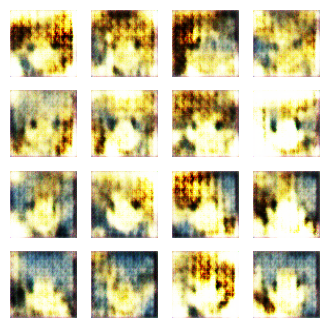

animeGenerated_wgan_0epochs


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Output of the calculating FID command:
FID:  310.89644913766426

FID_scores:  [310.89644913766426]
237/237 [==============================] - 90s 316ms/step - d_loss: -29.3975 - g_loss: 14.9654
Epoch 2/802
237/237 [==============================] - 32s 136ms/step - d_loss: -10.3334 - g_loss: 0.3895
Epoch 3/802
237/237 [==============================] - 32s 136ms/step - d_loss: -8.7414 - g_loss: -1.8385
Epoch 4/802
237/237 [==============================] - 32s 136ms/step - d_loss: -6.8956 - g_loss: -4.5452
Epoch 5/802
237/237 [==============================] - 32s 136ms/step - d_loss: -5.8898 - g_loss: -15.7351
Epoch 6/802
237/237 [==============================] - 32s 136ms/step - d_loss: -5.3809 - g_loss: -26.8107
Epoch 7/802
237/237 [==============================] - 32s 136ms/step - d_loss: -4.8507 - g_loss: -21.6170
Epoch 8/802
237/237 [==============================] - 32s 136ms/step - d_loss: -4.6422 - g_loss: -12.8884
Epoch 9/802
237/237 [==============================] - 32s 1

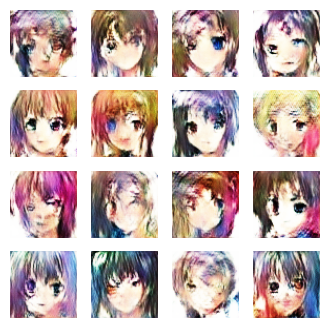

animeGenerated_wgan_10epochs


Output of the calculating FID command:
FID:  113.86022960251154

FID_scores:  [310.89644913766426, 113.86022960251154]
237/237 [==============================] - 48s 205ms/step - d_loss: -3.9496 - g_loss: -18.3949
Epoch 12/802
237/237 [==============================] - 32s 136ms/step - d_loss: -3.9474 - g_loss: -18.6552
Epoch 13/802
237/237 [==============================] - 32s 136ms/step - d_loss: -4.1390 - g_loss: -13.1692
Epoch 14/802
237/237 [==============================] - 32s 136ms/step - d_loss: -4.2784 - g_loss: -7.5249
Epoch 15/802
237/237 [==============================] - 32s 136ms/step - d_loss: -4.0767 - g_loss: -9.5710
Epoch 16/802
237/237 [==============================] - 32s 136ms/step - d_loss: -3.5466 - g_loss: -13.6237
Epoch 17/802
237/237 [==============================] - 32s 136ms/step - d_loss: -3.3074 - g_loss: -13.9367
Epoch 18/802
237/237 [==============================] - 32s 136ms/step - d_loss: -3.1294 - g_loss: -13.9725
Epoch 19/802
237/237 [==========

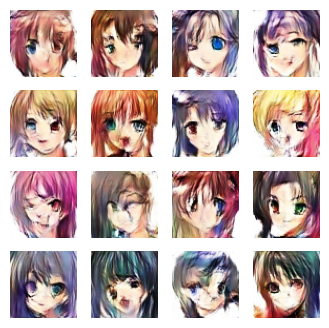

animeGenerated_wgan_20epochs


Output of the calculating FID command:
FID:  76.65208839156367

FID_scores:  [310.89644913766426, 113.86022960251154, 76.65208839156367]
237/237 [==============================] - 49s 206ms/step - d_loss: -2.9898 - g_loss: -14.0400
Epoch 22/802
237/237 [==============================] - 32s 136ms/step - d_loss: -2.8962 - g_loss: -11.4096
Epoch 23/802
237/237 [==============================] - 32s 136ms/step - d_loss: -2.7955 - g_loss: -11.4731
Epoch 24/802
237/237 [==============================] - 32s 136ms/step - d_loss: -2.7811 - g_loss: -10.4602
Epoch 25/802
237/237 [==============================] - 32s 136ms/step - d_loss: -2.7530 - g_loss: -10.8646
Epoch 26/802
237/237 [==============================] - 32s 136ms/step - d_loss: -2.6973 - g_loss: -9.5067
Epoch 27/802
237/237 [==============================] - 32s 136ms/step - d_loss: -2.5838 - g_loss: -10.0644
Epoch 28/802
237/237 [==============================] - 32s 136ms/step - d_loss: -2.6047 - g_loss: -9.0577
Epoch 29/802
2

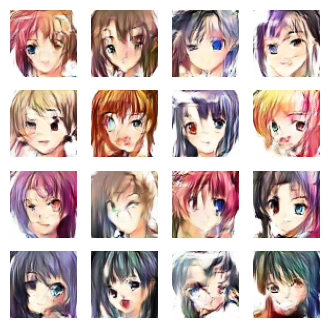

animeGenerated_wgan_30epochs


Output of the calculating FID command:
FID:  57.4473120630131

FID_scores:  [310.89644913766426, 113.86022960251154, 76.65208839156367, 57.4473120630131]
237/237 [==============================] - 48s 204ms/step - d_loss: -2.4814 - g_loss: -5.5822
Epoch 32/802
237/237 [==============================] - 32s 136ms/step - d_loss: -2.4389 - g_loss: -7.1937
Epoch 33/802
237/237 [==============================] - 32s 136ms/step - d_loss: -2.4871 - g_loss: -7.6792
Epoch 34/802
237/237 [==============================] - 32s 136ms/step - d_loss: -2.4182 - g_loss: -7.6496
Epoch 35/802
237/237 [==============================] - 32s 136ms/step - d_loss: -2.3290 - g_loss: -7.5894
Epoch 36/802
237/237 [==============================] - 32s 136ms/step - d_loss: -2.3326 - g_loss: -7.2505
Epoch 37/802
237/237 [==============================] - 32s 136ms/step - d_loss: -2.3094 - g_loss: -8.8286
Epoch 38/802
237/237 [==============================] - 32s 136ms/step - d_loss: -2.2421 - g_loss: -7.9957
Epo

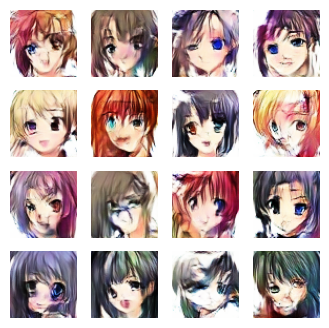

animeGenerated_wgan_40epochs


Output of the calculating FID command:
FID:  49.230976734964116

FID_scores:  [310.89644913766426, 113.86022960251154, 76.65208839156367, 57.4473120630131, 49.230976734964116]
237/237 [==============================] - 49s 205ms/step - d_loss: -2.2619 - g_loss: -8.3605
Epoch 42/802
237/237 [==============================] - 32s 136ms/step - d_loss: -2.2316 - g_loss: -7.9678
Epoch 43/802
237/237 [==============================] - 32s 136ms/step - d_loss: -2.2109 - g_loss: -9.0356
Epoch 44/802
237/237 [==============================] - 32s 136ms/step - d_loss: -2.1772 - g_loss: -10.5192
Epoch 45/802
237/237 [==============================] - 32s 136ms/step - d_loss: -2.1293 - g_loss: -10.7530
Epoch 46/802
237/237 [==============================] - 32s 136ms/step - d_loss: -2.1028 - g_loss: -10.6729
Epoch 47/802
237/237 [==============================] - 32s 136ms/step - d_loss: -2.0932 - g_loss: -6.6077
Epoch 48/802
237/237 [==============================] - 32s 136ms/step - d_loss: -2.0

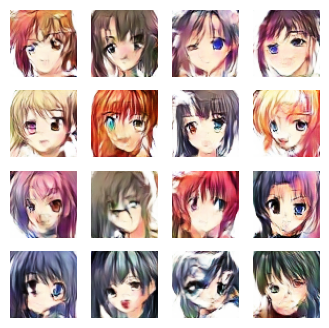

animeGenerated_wgan_50epochs


Output of the calculating FID command:
FID:  46.03839083967449

FID_scores:  [310.89644913766426, 113.86022960251154, 76.65208839156367, 57.4473120630131, 49.230976734964116, 46.03839083967449]
237/237 [==============================] - 49s 205ms/step - d_loss: -2.0182 - g_loss: -7.5520
Epoch 52/802
237/237 [==============================] - 32s 136ms/step - d_loss: -2.0415 - g_loss: -6.8631
Epoch 53/802
237/237 [==============================] - 32s 136ms/step - d_loss: -1.9612 - g_loss: -8.6732
Epoch 54/802
237/237 [==============================] - 32s 136ms/step - d_loss: -1.9696 - g_loss: -7.0849
Epoch 55/802
237/237 [==============================] - 32s 136ms/step - d_loss: -1.9445 - g_loss: -4.5943
Epoch 56/802
237/237 [==============================] - 32s 136ms/step - d_loss: -1.9037 - g_loss: -4.9535
Epoch 57/802
237/237 [==============================] - 32s 136ms/step - d_loss: -1.8966 - g_loss: -3.4252
Epoch 58/802
237/237 [==============================] - 32s 136ms/step

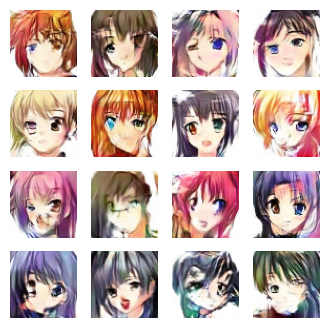

animeGenerated_wgan_60epochs


Output of the calculating FID command:
FID:  41.75931670273431

FID_scores:  [310.89644913766426, 113.86022960251154, 76.65208839156367, 57.4473120630131, 49.230976734964116, 46.03839083967449, 41.75931670273431]
237/237 [==============================] - 48s 204ms/step - d_loss: -1.9291 - g_loss: -5.4616
Epoch 62/802
237/237 [==============================] - 32s 136ms/step - d_loss: -1.9345 - g_loss: -4.7514
Epoch 63/802
237/237 [==============================] - 32s 136ms/step - d_loss: -1.8825 - g_loss: -5.7908
Epoch 64/802
237/237 [==============================] - 32s 136ms/step - d_loss: -1.8481 - g_loss: -5.4485
Epoch 65/802
237/237 [==============================] - 32s 136ms/step - d_loss: -1.8027 - g_loss: -5.0433
Epoch 66/802
237/237 [==============================] - 32s 136ms/step - d_loss: -1.7503 - g_loss: -2.6802
Epoch 67/802
237/237 [==============================] - 32s 136ms/step - d_loss: -1.8155 - g_loss: -0.1726
Epoch 68/802
237/237 [=============================

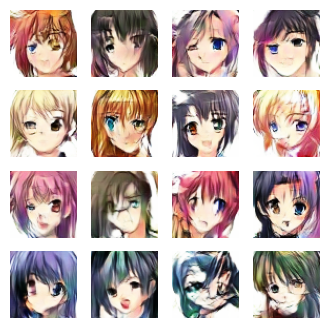

animeGenerated_wgan_70epochs


Output of the calculating FID command:
FID:  39.86533789204478

FID_scores:  [310.89644913766426, 113.86022960251154, 76.65208839156367, 57.4473120630131, 49.230976734964116, 46.03839083967449, 41.75931670273431, 39.86533789204478]
237/237 [==============================] - 49s 206ms/step - d_loss: -1.7984 - g_loss: -2.3169
Epoch 72/802
237/237 [==============================] - 32s 136ms/step - d_loss: -1.7792 - g_loss: -0.2561
Epoch 73/802
237/237 [==============================] - 32s 136ms/step - d_loss: -1.6924 - g_loss: -1.0327
Epoch 74/802
237/237 [==============================] - 32s 136ms/step - d_loss: -1.7147 - g_loss: -1.1023
Epoch 75/802
237/237 [==============================] - 32s 136ms/step - d_loss: -1.7779 - g_loss: -3.0016
Epoch 76/802
237/237 [==============================] - 32s 136ms/step - d_loss: -1.7093 - g_loss: -2.0592
Epoch 77/802
237/237 [==============================] - 32s 136ms/step - d_loss: -1.7010 - g_loss: -1.9952
Epoch 78/802
237/237 [==========

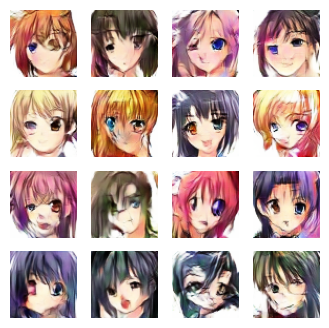

animeGenerated_wgan_80epochs


Output of the calculating FID command:
FID:  38.6269483063931

FID_scores:  [310.89644913766426, 113.86022960251154, 76.65208839156367, 57.4473120630131, 49.230976734964116, 46.03839083967449, 41.75931670273431, 39.86533789204478, 38.6269483063931]
237/237 [==============================] - 49s 207ms/step - d_loss: -1.7034 - g_loss: -2.7680
Epoch 82/802
237/237 [==============================] - 32s 136ms/step - d_loss: -1.7078 - g_loss: -0.2694
Epoch 83/802
237/237 [==============================] - 32s 136ms/step - d_loss: -1.7158 - g_loss: 1.3189
Epoch 84/802
237/237 [==============================] - 32s 136ms/step - d_loss: -1.7434 - g_loss: -0.9382
Epoch 85/802
237/237 [==============================] - 32s 136ms/step - d_loss: -1.7480 - g_loss: -1.9789
Epoch 86/802
237/237 [==============================] - 32s 136ms/step - d_loss: -1.7498 - g_loss: 1.0733
Epoch 87/802
237/237 [==============================] - 32s 136ms/step - d_loss: -1.7118 - g_loss: -2.0843
Epoch 88/802
237/

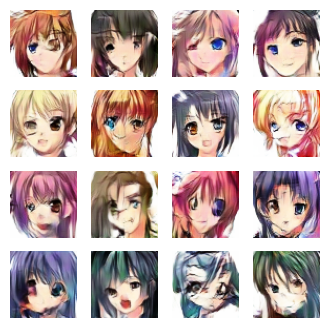

animeGenerated_wgan_90epochs


Output of the calculating FID command:
FID:  35.71037020601801

FID_scores:  [310.89644913766426, 113.86022960251154, 76.65208839156367, 57.4473120630131, 49.230976734964116, 46.03839083967449, 41.75931670273431, 39.86533789204478, 38.6269483063931, 35.71037020601801]
237/237 [==============================] - 50s 209ms/step - d_loss: -1.7322 - g_loss: 7.0663
Epoch 92/802
237/237 [==============================] - 32s 136ms/step - d_loss: -1.6928 - g_loss: 3.1292
Epoch 93/802
237/237 [==============================] - 32s 136ms/step - d_loss: -1.6294 - g_loss: 5.6012
Epoch 94/802
237/237 [==============================] - 32s 136ms/step - d_loss: -1.6631 - g_loss: 6.5416
Epoch 95/802
237/237 [==============================] - 32s 136ms/step - d_loss: -1.6712 - g_loss: 4.5791
Epoch 96/802
237/237 [==============================] - 32s 136ms/step - d_loss: -1.6457 - g_loss: 4.6593
Epoch 97/802
237/237 [==============================] - 32s 136ms/step - d_loss: -1.6052 - g_loss: 7.6488
Ep

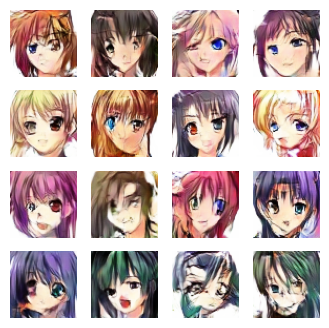

animeGenerated_wgan_100epochs


Output of the calculating FID command:
FID:  36.51144623933607

FID_scores:  [310.89644913766426, 113.86022960251154, 76.65208839156367, 57.4473120630131, 49.230976734964116, 46.03839083967449, 41.75931670273431, 39.86533789204478, 38.6269483063931, 35.71037020601801, 36.51144623933607]
[310.89644914 113.8602296   76.65208839  57.44731206  49.23097673
  46.03839084  41.7593167   39.86533789  38.62694831  35.71037021
  36.51144624]


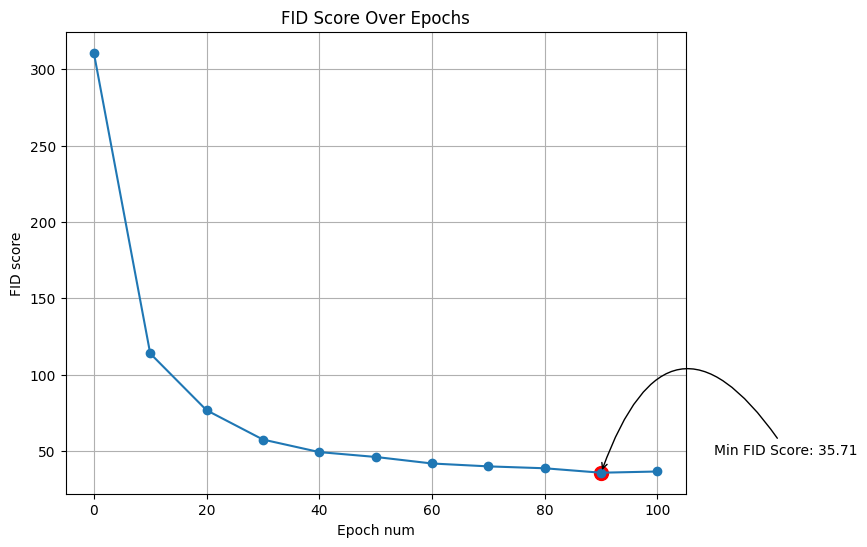

237/237 [==============================] - 50s 212ms/step - d_loss: -1.5672 - g_loss: 4.2570
Epoch 102/802
237/237 [==============================] - 32s 136ms/step - d_loss: -1.5796 - g_loss: 4.5049
Epoch 103/802
237/237 [==============================] - 32s 136ms/step - d_loss: -1.5543 - g_loss: 4.3400
Epoch 104/802
237/237 [==============================] - 32s 136ms/step - d_loss: -1.5280 - g_loss: 6.0699
Epoch 105/802
237/237 [==============================] - 32s 136ms/step - d_loss: -1.5194 - g_loss: 6.8916
Epoch 106/802
237/237 [==============================] - 32s 136ms/step - d_loss: -1.4982 - g_loss: 3.8901
Epoch 107/802
237/237 [==============================] - 32s 136ms/step - d_loss: -1.5590 - g_loss: 4.3812
Epoch 108/802
237/237 [==============================] - 32s 136ms/step - d_loss: -1.4823 - g_loss: 6.8457
Epoch 109/802
237/237 [==============================] - 32s 136ms/step - d_loss: -1.5127 - g_loss: 8.5040
Epoch 110/802
237/237 [============================

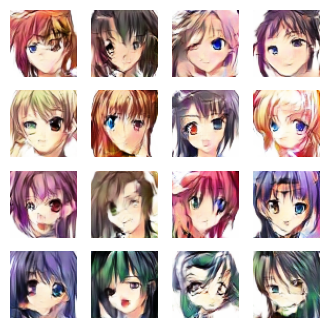

animeGenerated_wgan_110epochs


Output of the calculating FID command:
FID:  36.32309230376967

FID_scores:  [310.89644913766426, 113.86022960251154, 76.65208839156367, 57.4473120630131, 49.230976734964116, 46.03839083967449, 41.75931670273431, 39.86533789204478, 38.6269483063931, 35.71037020601801, 36.51144623933607, 36.32309230376967]
[310.89644914 113.8602296   76.65208839  57.44731206  49.23097673
  46.03839084  41.7593167   39.86533789  38.62694831  35.71037021
  36.51144624  36.3230923 ]


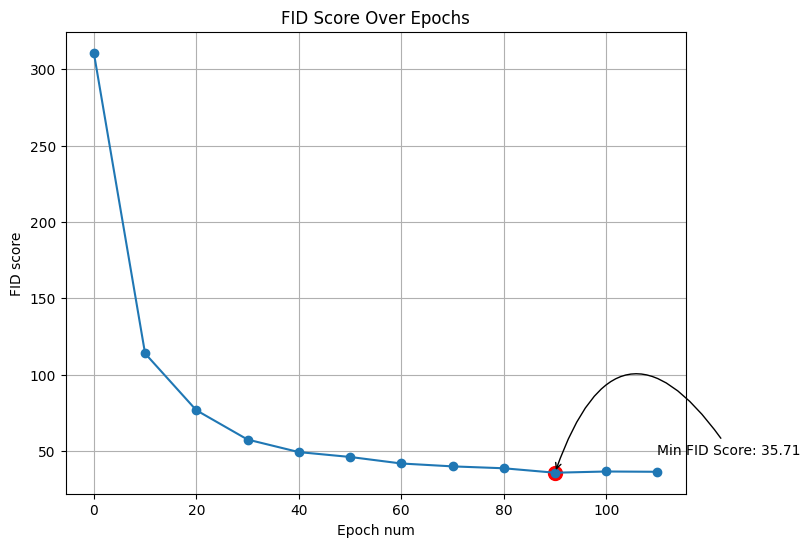

237/237 [==============================] - 49s 208ms/step - d_loss: -1.4689 - g_loss: 11.6705
Epoch 112/802
237/237 [==============================] - 32s 136ms/step - d_loss: -1.5370 - g_loss: 12.2787
Epoch 113/802
237/237 [==============================] - 32s 136ms/step - d_loss: -1.4688 - g_loss: 10.6428
Epoch 114/802
237/237 [==============================] - 32s 136ms/step - d_loss: -1.5222 - g_loss: 11.2239
Epoch 115/802
237/237 [==============================] - 32s 136ms/step - d_loss: -1.4845 - g_loss: 9.0278
Epoch 116/802
237/237 [==============================] - 32s 136ms/step - d_loss: -1.5110 - g_loss: 9.4227
Epoch 117/802
237/237 [==============================] - 32s 136ms/step - d_loss: -1.4285 - g_loss: 7.5802
Epoch 118/802
237/237 [==============================] - 32s 136ms/step - d_loss: -1.4638 - g_loss: 9.4088
Epoch 119/802
237/237 [==============================] - 32s 136ms/step - d_loss: -1.4636 - g_loss: 7.6190
Epoch 120/802
237/237 [========================

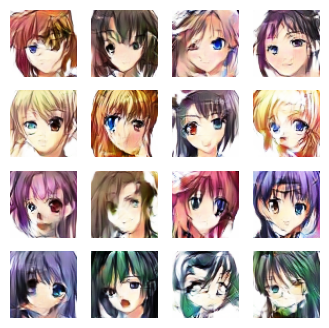

animeGenerated_wgan_120epochs


Output of the calculating FID command:
FID:  34.02147786293958

FID_scores:  [310.89644913766426, 113.86022960251154, 76.65208839156367, 57.4473120630131, 49.230976734964116, 46.03839083967449, 41.75931670273431, 39.86533789204478, 38.6269483063931, 35.71037020601801, 36.51144623933607, 36.32309230376967, 34.02147786293958]
[310.89644914 113.8602296   76.65208839  57.44731206  49.23097673
  46.03839084  41.7593167   39.86533789  38.62694831  35.71037021
  36.51144624  36.3230923   34.02147786]


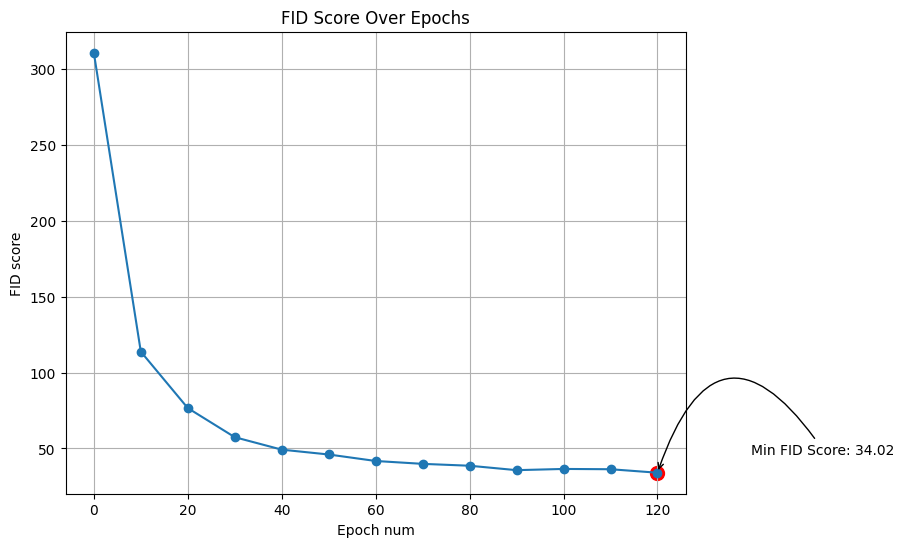

237/237 [==============================] - 49s 206ms/step - d_loss: -1.4428 - g_loss: 6.9914
Epoch 122/802
237/237 [==============================] - 32s 136ms/step - d_loss: -1.4535 - g_loss: 8.0648
Epoch 123/802
237/237 [==============================] - 32s 136ms/step - d_loss: -1.3938 - g_loss: 9.1875
Epoch 124/802
237/237 [==============================] - 32s 136ms/step - d_loss: -1.4234 - g_loss: 8.3440
Epoch 125/802
237/237 [==============================] - 32s 136ms/step - d_loss: -1.4272 - g_loss: 7.7984
Epoch 126/802
237/237 [==============================] - 32s 136ms/step - d_loss: -1.4302 - g_loss: 5.8519
Epoch 127/802
237/237 [==============================] - 32s 136ms/step - d_loss: -1.4600 - g_loss: 9.1194
Epoch 128/802
237/237 [==============================] - 32s 136ms/step - d_loss: -1.4195 - g_loss: 6.2999
Epoch 129/802
237/237 [==============================] - 32s 136ms/step - d_loss: -1.4490 - g_loss: 4.8970
Epoch 130/802
237/237 [============================

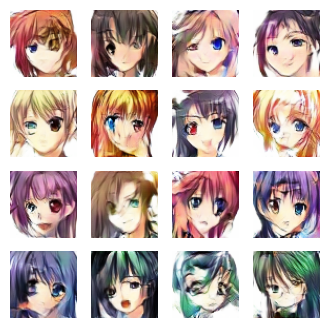

animeGenerated_wgan_130epochs


Output of the calculating FID command:
FID:  32.93571822724115

FID_scores:  [310.89644913766426, 113.86022960251154, 76.65208839156367, 57.4473120630131, 49.230976734964116, 46.03839083967449, 41.75931670273431, 39.86533789204478, 38.6269483063931, 35.71037020601801, 36.51144623933607, 36.32309230376967, 34.02147786293958, 32.93571822724115]
[310.89644914 113.8602296   76.65208839  57.44731206  49.23097673
  46.03839084  41.7593167   39.86533789  38.62694831  35.71037021
  36.51144624  36.3230923   34.02147786  32.93571823]


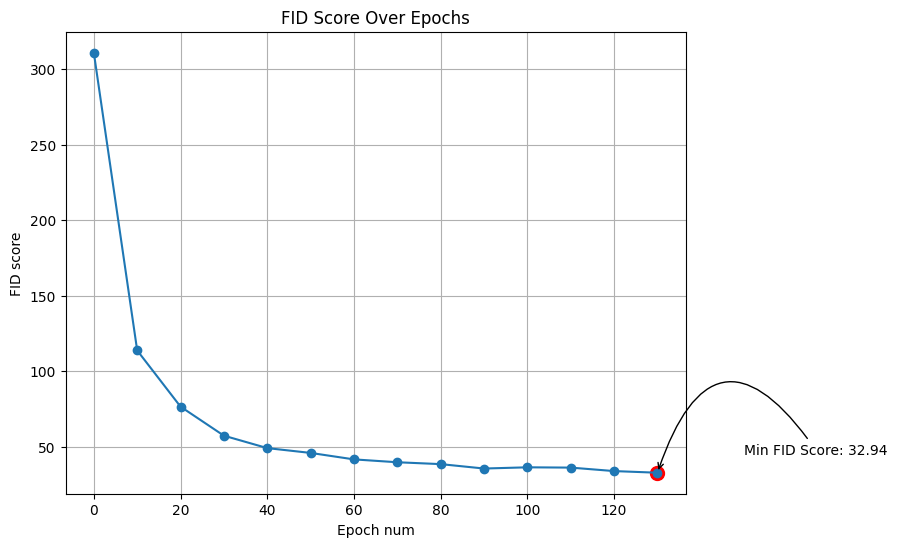

237/237 [==============================] - 49s 206ms/step - d_loss: -1.4242 - g_loss: 8.3634
Epoch 132/802
237/237 [==============================] - 32s 136ms/step - d_loss: -1.3802 - g_loss: 14.2316
Epoch 133/802
237/237 [==============================] - 32s 136ms/step - d_loss: -1.4560 - g_loss: 11.0412
Epoch 134/802
237/237 [==============================] - 32s 136ms/step - d_loss: -1.3540 - g_loss: 11.5314
Epoch 135/802
237/237 [==============================] - 32s 136ms/step - d_loss: -1.4736 - g_loss: 8.7015
Epoch 136/802
237/237 [==============================] - 32s 136ms/step - d_loss: -1.3645 - g_loss: 6.5129
Epoch 137/802
237/237 [==============================] - 32s 136ms/step - d_loss: -1.4748 - g_loss: 5.3349
Epoch 138/802
237/237 [==============================] - 32s 136ms/step - d_loss: -1.4152 - g_loss: 0.4437
Epoch 139/802
237/237 [==============================] - 32s 136ms/step - d_loss: -1.4319 - g_loss: 1.2111
Epoch 140/802
237/237 [=========================

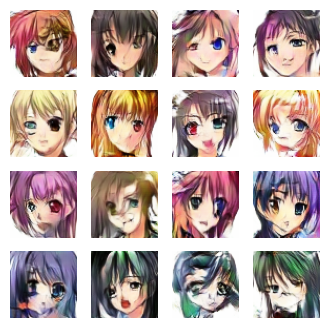

animeGenerated_wgan_140epochs


Output of the calculating FID command:
FID:  34.216103419826624

FID_scores:  [310.89644913766426, 113.86022960251154, 76.65208839156367, 57.4473120630131, 49.230976734964116, 46.03839083967449, 41.75931670273431, 39.86533789204478, 38.6269483063931, 35.71037020601801, 36.51144623933607, 36.32309230376967, 34.02147786293958, 32.93571822724115, 34.216103419826624]
[310.89644914 113.8602296   76.65208839  57.44731206  49.23097673
  46.03839084  41.7593167   39.86533789  38.62694831  35.71037021
  36.51144624  36.3230923   34.02147786  32.93571823  34.21610342]


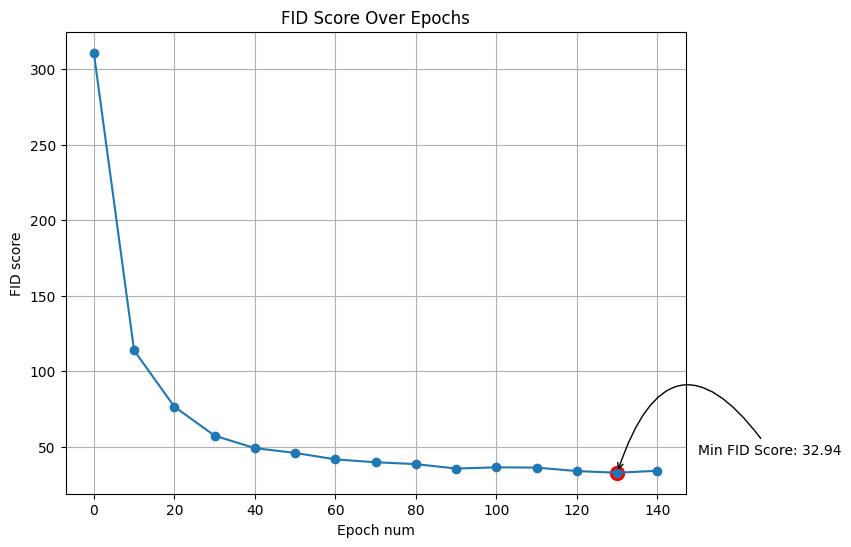

237/237 [==============================] - 49s 206ms/step - d_loss: -1.3822 - g_loss: 4.0217
Epoch 142/802
237/237 [==============================] - 32s 136ms/step - d_loss: -1.4140 - g_loss: 5.7935
Epoch 143/802
237/237 [==============================] - 32s 136ms/step - d_loss: -1.3478 - g_loss: 4.0383
Epoch 144/802
237/237 [==============================] - 32s 136ms/step - d_loss: -1.4387 - g_loss: 2.8658
Epoch 145/802
237/237 [==============================] - 32s 136ms/step - d_loss: -1.3552 - g_loss: 1.9199
Epoch 146/802
237/237 [==============================] - 32s 136ms/step - d_loss: -1.3292 - g_loss: 1.7436
Epoch 147/802
237/237 [==============================] - 32s 136ms/step - d_loss: -1.3951 - g_loss: -0.4115
Epoch 148/802
237/237 [==============================] - 32s 136ms/step - d_loss: -1.3638 - g_loss: -0.1705
Epoch 149/802
237/237 [==============================] - 32s 136ms/step - d_loss: -1.2699 - g_loss: -4.3433
Epoch 150/802
237/237 [=========================

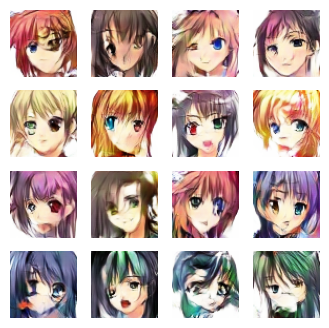

animeGenerated_wgan_150epochs


Output of the calculating FID command:
FID:  33.082243710351804

FID_scores:  [310.89644913766426, 113.86022960251154, 76.65208839156367, 57.4473120630131, 49.230976734964116, 46.03839083967449, 41.75931670273431, 39.86533789204478, 38.6269483063931, 35.71037020601801, 36.51144623933607, 36.32309230376967, 34.02147786293958, 32.93571822724115, 34.216103419826624, 33.082243710351804]
[310.89644914 113.8602296   76.65208839  57.44731206  49.23097673
  46.03839084  41.7593167   39.86533789  38.62694831  35.71037021
  36.51144624  36.3230923   34.02147786  32.93571823  34.21610342
  33.08224371]


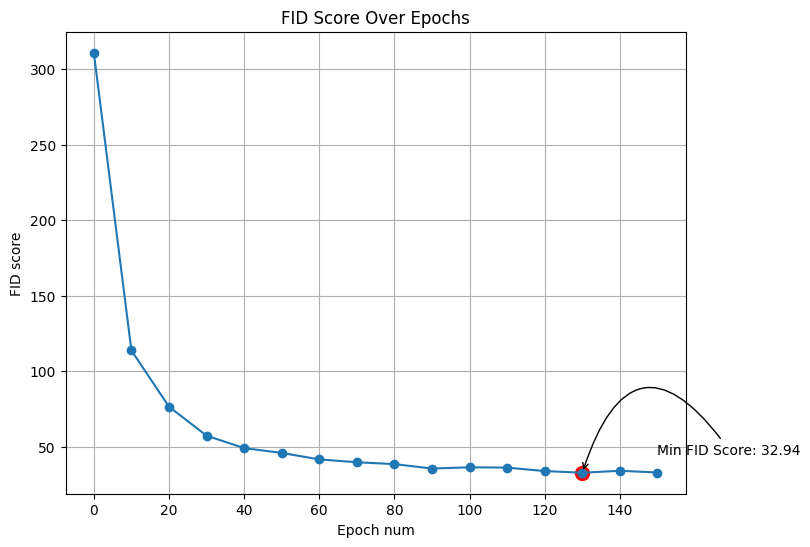

237/237 [==============================] - 50s 211ms/step - d_loss: -1.2489 - g_loss: -4.2122
Epoch 152/802
237/237 [==============================] - 32s 136ms/step - d_loss: -1.2531 - g_loss: 1.3558
Epoch 153/802
237/237 [==============================] - 32s 136ms/step - d_loss: -1.4049 - g_loss: -6.7048
Epoch 154/802
237/237 [==============================] - 32s 136ms/step - d_loss: -1.2258 - g_loss: -3.2734
Epoch 155/802
237/237 [==============================] - 32s 136ms/step - d_loss: -1.2636 - g_loss: -1.9412
Epoch 156/802
237/237 [==============================] - 32s 136ms/step - d_loss: -1.2255 - g_loss: -7.1439
Epoch 157/802
237/237 [==============================] - 32s 136ms/step - d_loss: -1.2208 - g_loss: -7.6925
Epoch 158/802
237/237 [==============================] - 32s 136ms/step - d_loss: -1.3381 - g_loss: -10.4000
Epoch 159/802
237/237 [==============================] - 32s 136ms/step - d_loss: -1.2435 - g_loss: -10.5487
Epoch 160/802
237/237 [==================

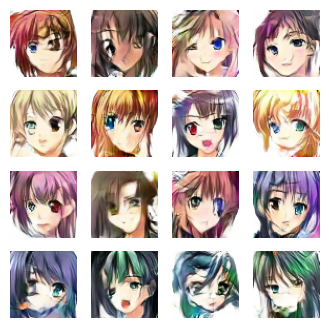

animeGenerated_wgan_160epochs


Output of the calculating FID command:
FID:  32.59043386167457

FID_scores:  [310.89644913766426, 113.86022960251154, 76.65208839156367, 57.4473120630131, 49.230976734964116, 46.03839083967449, 41.75931670273431, 39.86533789204478, 38.6269483063931, 35.71037020601801, 36.51144623933607, 36.32309230376967, 34.02147786293958, 32.93571822724115, 34.216103419826624, 33.082243710351804, 32.59043386167457]
[310.89644914 113.8602296   76.65208839  57.44731206  49.23097673
  46.03839084  41.7593167   39.86533789  38.62694831  35.71037021
  36.51144624  36.3230923   34.02147786  32.93571823  34.21610342
  33.08224371  32.59043386]


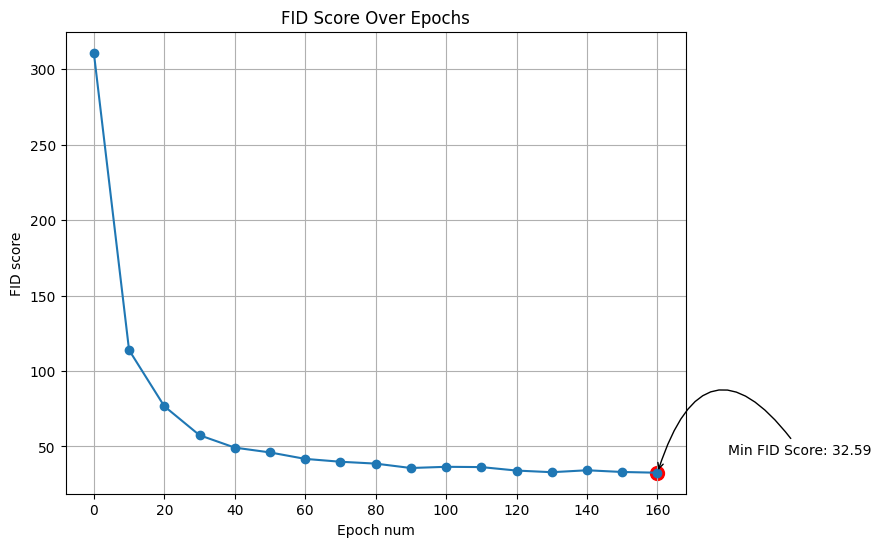

237/237 [==============================] - 49s 208ms/step - d_loss: -1.2792 - g_loss: -8.6627
Epoch 162/802
237/237 [==============================] - 32s 136ms/step - d_loss: -1.3640 - g_loss: -9.3939
Epoch 163/802
237/237 [==============================] - 32s 136ms/step - d_loss: -1.2762 - g_loss: -3.4828
Epoch 164/802
237/237 [==============================] - 32s 136ms/step - d_loss: -1.1738 - g_loss: -2.5632
Epoch 165/802
237/237 [==============================] - 32s 136ms/step - d_loss: -1.2059 - g_loss: -7.7085
Epoch 166/802
237/237 [==============================] - 32s 136ms/step - d_loss: -1.2183 - g_loss: -6.3058
Epoch 167/802
237/237 [==============================] - 32s 136ms/step - d_loss: -1.2533 - g_loss: -3.8752
Epoch 168/802
237/237 [==============================] - 32s 136ms/step - d_loss: -1.2481 - g_loss: -5.8254
Epoch 169/802
237/237 [==============================] - 32s 136ms/step - d_loss: -1.1814 - g_loss: -8.6593
Epoch 170/802
237/237 [===================

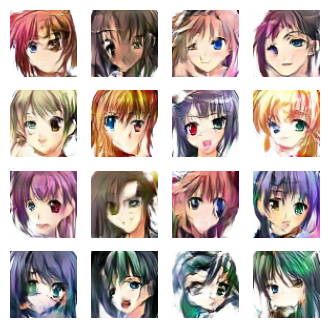

animeGenerated_wgan_170epochs


Output of the calculating FID command:
FID:  33.733076056643796

FID_scores:  [310.89644913766426, 113.86022960251154, 76.65208839156367, 57.4473120630131, 49.230976734964116, 46.03839083967449, 41.75931670273431, 39.86533789204478, 38.6269483063931, 35.71037020601801, 36.51144623933607, 36.32309230376967, 34.02147786293958, 32.93571822724115, 34.216103419826624, 33.082243710351804, 32.59043386167457, 33.733076056643796]
[310.89644914 113.8602296   76.65208839  57.44731206  49.23097673
  46.03839084  41.7593167   39.86533789  38.62694831  35.71037021
  36.51144624  36.3230923   34.02147786  32.93571823  34.21610342
  33.08224371  32.59043386  33.73307606]


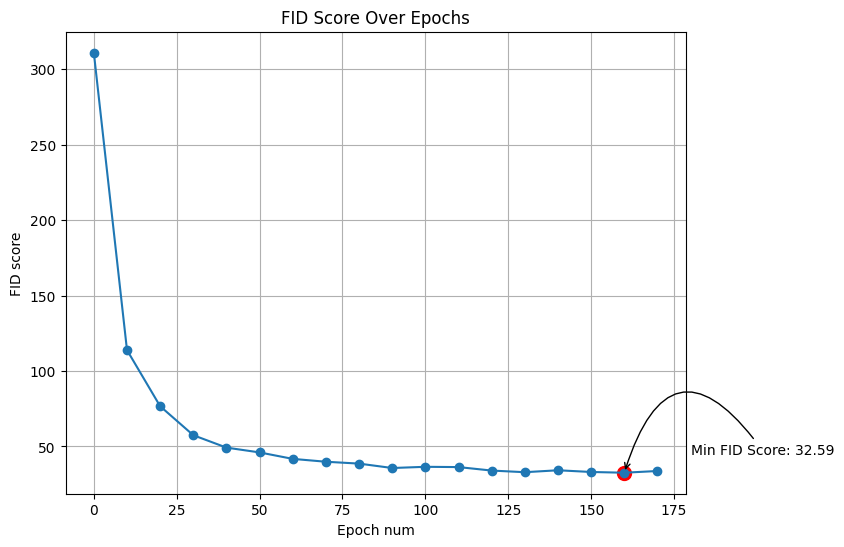

237/237 [==============================] - 49s 206ms/step - d_loss: -1.2551 - g_loss: -8.2412
Epoch 172/802
237/237 [==============================] - 32s 136ms/step - d_loss: -1.2502 - g_loss: -8.6560
Epoch 173/802
237/237 [==============================] - 32s 136ms/step - d_loss: -1.1342 - g_loss: -2.7886
Epoch 174/802
237/237 [==============================] - 32s 136ms/step - d_loss: -1.2052 - g_loss: -6.5111
Epoch 175/802
237/237 [==============================] - 32s 136ms/step - d_loss: -1.2237 - g_loss: -11.8352
Epoch 176/802
237/237 [==============================] - 32s 136ms/step - d_loss: -1.0894 - g_loss: -7.3775
Epoch 177/802
237/237 [==============================] - 32s 136ms/step - d_loss: -1.2495 - g_loss: -4.7966
Epoch 178/802
237/237 [==============================] - 32s 136ms/step - d_loss: -1.2199 - g_loss: -6.6329
Epoch 179/802
237/237 [==============================] - 32s 136ms/step - d_loss: -1.1962 - g_loss: -1.2674
Epoch 180/802
237/237 [==================

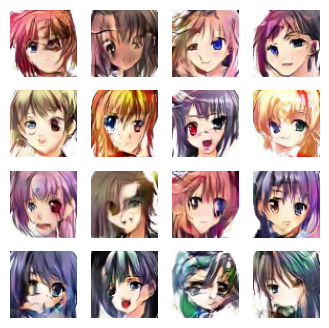

animeGenerated_wgan_180epochs


Output of the calculating FID command:
FID:  34.852104707107685

FID_scores:  [310.89644913766426, 113.86022960251154, 76.65208839156367, 57.4473120630131, 49.230976734964116, 46.03839083967449, 41.75931670273431, 39.86533789204478, 38.6269483063931, 35.71037020601801, 36.51144623933607, 36.32309230376967, 34.02147786293958, 32.93571822724115, 34.216103419826624, 33.082243710351804, 32.59043386167457, 33.733076056643796, 34.852104707107685]
[310.89644914 113.8602296   76.65208839  57.44731206  49.23097673
  46.03839084  41.7593167   39.86533789  38.62694831  35.71037021
  36.51144624  36.3230923   34.02147786  32.93571823  34.21610342
  33.08224371  32.59043386  33.73307606  34.85210471]


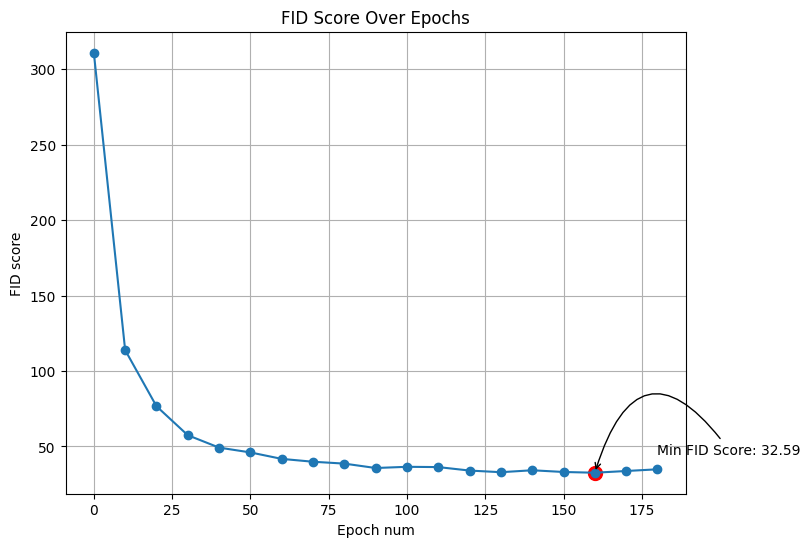

237/237 [==============================] - 49s 207ms/step - d_loss: -1.1898 - g_loss: 4.8780
Epoch 182/802
237/237 [==============================] - 32s 136ms/step - d_loss: -1.2215 - g_loss: 0.2540
Epoch 183/802
237/237 [==============================] - 32s 136ms/step - d_loss: -1.1553 - g_loss: -4.7193
Epoch 184/802
237/237 [==============================] - 32s 136ms/step - d_loss: -1.1833 - g_loss: -5.2328
Epoch 185/802
237/237 [==============================] - 32s 136ms/step - d_loss: -1.1159 - g_loss: -0.3142
Epoch 186/802
237/237 [==============================] - 32s 136ms/step - d_loss: -1.1580 - g_loss: 6.2311
Epoch 187/802
237/237 [==============================] - 32s 136ms/step - d_loss: -1.0521 - g_loss: 10.4262
Epoch 188/802
237/237 [==============================] - 32s 136ms/step - d_loss: -1.1692 - g_loss: -3.2077
Epoch 189/802
237/237 [==============================] - 32s 136ms/step - d_loss: -1.2378 - g_loss: -16.3920
Epoch 190/802
237/237 [=====================

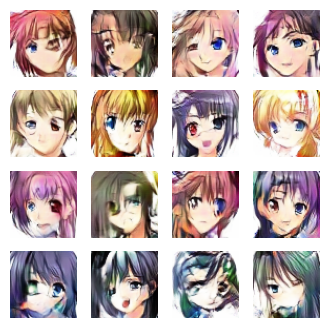

animeGenerated_wgan_190epochs


Output of the calculating FID command:
FID:  36.65853997190007

FID_scores:  [310.89644913766426, 113.86022960251154, 76.65208839156367, 57.4473120630131, 49.230976734964116, 46.03839083967449, 41.75931670273431, 39.86533789204478, 38.6269483063931, 35.71037020601801, 36.51144623933607, 36.32309230376967, 34.02147786293958, 32.93571822724115, 34.216103419826624, 33.082243710351804, 32.59043386167457, 33.733076056643796, 34.852104707107685, 36.65853997190007]
[310.89644914 113.8602296   76.65208839  57.44731206  49.23097673
  46.03839084  41.7593167   39.86533789  38.62694831  35.71037021
  36.51144624  36.3230923   34.02147786  32.93571823  34.21610342
  33.08224371  32.59043386  33.73307606  34.85210471  36.65853997]


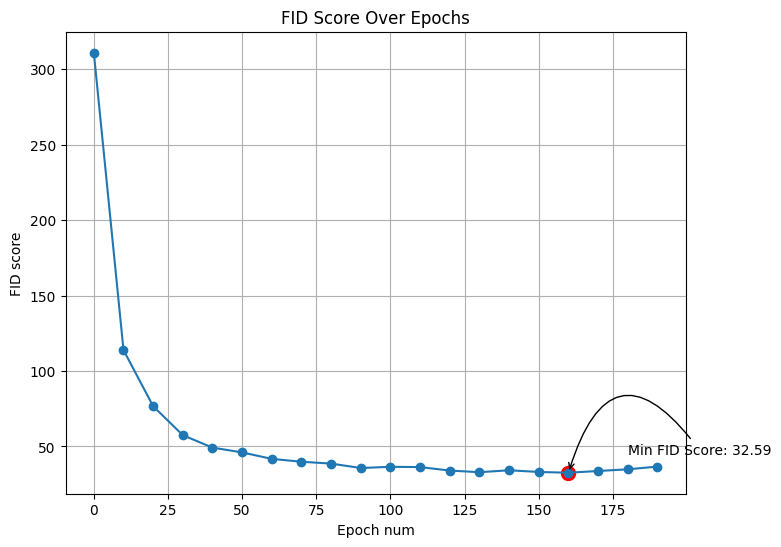

237/237 [==============================] - 50s 209ms/step - d_loss: -1.0558 - g_loss: -6.6889
Epoch 192/802
237/237 [==============================] - 32s 136ms/step - d_loss: -1.0914 - g_loss: -1.5996
Epoch 193/802
237/237 [==============================] - 32s 136ms/step - d_loss: -1.1205 - g_loss: 4.9383
Epoch 194/802
237/237 [==============================] - 33s 137ms/step - d_loss: -0.9102 - g_loss: -14.2513
Epoch 195/802
237/237 [==============================] - 32s 136ms/step - d_loss: -0.9836 - g_loss: -1.4351
Epoch 196/802
237/237 [==============================] - 32s 136ms/step - d_loss: -0.9037 - g_loss: -4.4984
Epoch 197/802
237/237 [==============================] - 32s 136ms/step - d_loss: -0.8811 - g_loss: -34.3278
Epoch 198/802
237/237 [==============================] - 32s 136ms/step - d_loss: -1.0594 - g_loss: -34.1281
Epoch 199/802
237/237 [==============================] - 32s 136ms/step - d_loss: -0.9090 - g_loss: -3.1442
Epoch 200/802
237/237 [=================

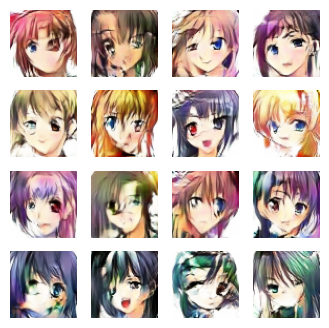

animeGenerated_wgan_200epochs


Output of the calculating FID command:
FID:  44.45719450731241

FID_scores:  [310.89644913766426, 113.86022960251154, 76.65208839156367, 57.4473120630131, 49.230976734964116, 46.03839083967449, 41.75931670273431, 39.86533789204478, 38.6269483063931, 35.71037020601801, 36.51144623933607, 36.32309230376967, 34.02147786293958, 32.93571822724115, 34.216103419826624, 33.082243710351804, 32.59043386167457, 33.733076056643796, 34.852104707107685, 36.65853997190007, 44.45719450731241]
[310.89644914 113.8602296   76.65208839  57.44731206  49.23097673
  46.03839084  41.7593167   39.86533789  38.62694831  35.71037021
  36.51144624  36.3230923   34.02147786  32.93571823  34.21610342
  33.08224371  32.59043386  33.73307606  34.85210471  36.65853997
  44.45719451]


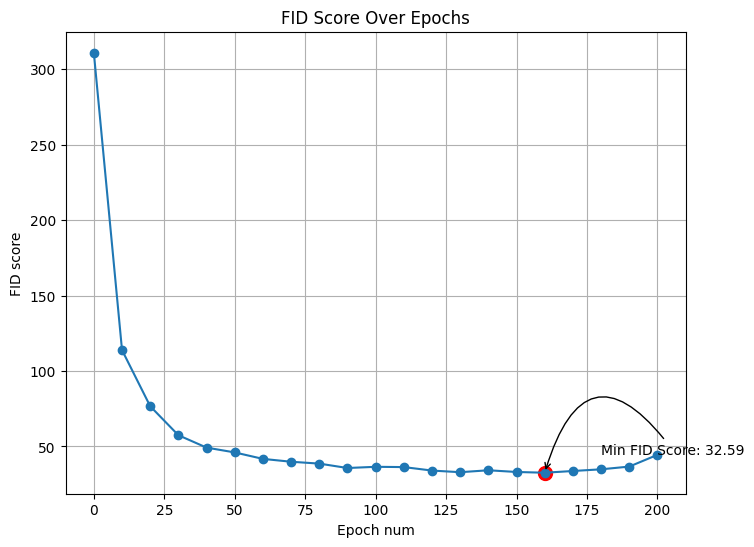

237/237 [==============================] - 50s 210ms/step - d_loss: -0.7536 - g_loss: -38.6420
Epoch 202/802
237/237 [==============================] - 32s 136ms/step - d_loss: -1.1974 - g_loss: -15.4982
Epoch 203/802
237/237 [==============================] - 32s 136ms/step - d_loss: -0.8616 - g_loss: -15.0355
Epoch 204/802
237/237 [==============================] - 32s 136ms/step - d_loss: -0.6625 - g_loss: -47.6590
Epoch 205/802
237/237 [==============================] - 32s 136ms/step - d_loss: -1.1419 - g_loss: -67.0408
Epoch 206/802
237/237 [==============================] - 32s 136ms/step - d_loss: -0.9053 - g_loss: -32.3459
Epoch 207/802
237/237 [==============================] - 32s 136ms/step - d_loss: -0.9524 - g_loss: 31.3874
Epoch 208/802
237/237 [==============================] - 32s 136ms/step - d_loss: -1.0463 - g_loss: -6.6092
Epoch 209/802
237/237 [==============================] - 32s 136ms/step - d_loss: -1.0279 - g_loss: -51.1602
Epoch 210/802
237/237 [============

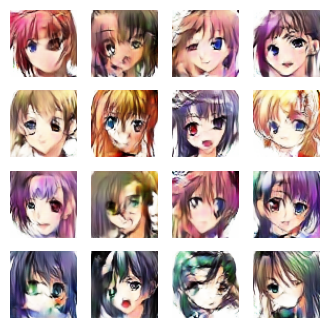

animeGenerated_wgan_210epochs


Output of the calculating FID command:
FID:  48.063358537923136

FID_scores:  [310.89644913766426, 113.86022960251154, 76.65208839156367, 57.4473120630131, 49.230976734964116, 46.03839083967449, 41.75931670273431, 39.86533789204478, 38.6269483063931, 35.71037020601801, 36.51144623933607, 36.32309230376967, 34.02147786293958, 32.93571822724115, 34.216103419826624, 33.082243710351804, 32.59043386167457, 33.733076056643796, 34.852104707107685, 36.65853997190007, 44.45719450731241, 48.063358537923136]
[310.89644914 113.8602296   76.65208839  57.44731206  49.23097673
  46.03839084  41.7593167   39.86533789  38.62694831  35.71037021
  36.51144624  36.3230923   34.02147786  32.93571823  34.21610342
  33.08224371  32.59043386  33.73307606  34.85210471  36.65853997
  44.45719451  48.06335854]


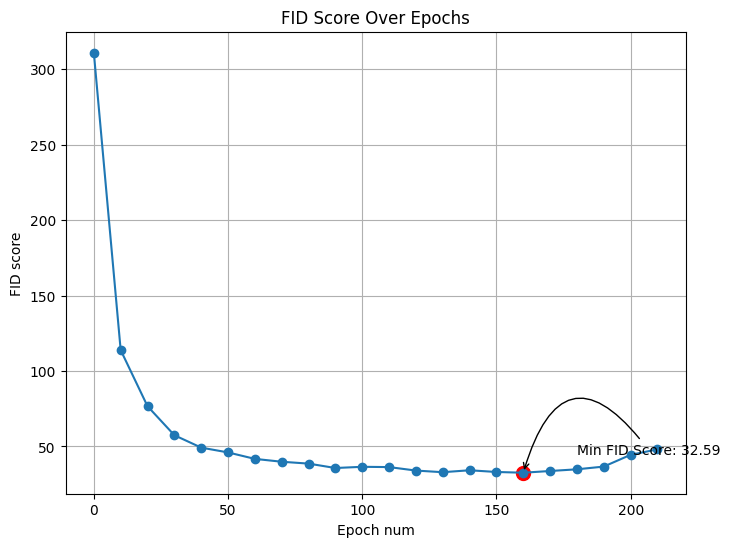

237/237 [==============================] - 49s 206ms/step - d_loss: -1.1265 - g_loss: -2.0891
Epoch 212/802
237/237 [==============================] - 32s 136ms/step - d_loss: -0.9416 - g_loss: 51.3613
Epoch 213/802
237/237 [==============================] - 32s 136ms/step - d_loss: -0.9903 - g_loss: 11.7387
Epoch 214/802
237/237 [==============================] - 32s 136ms/step - d_loss: -1.2018 - g_loss: -71.5377
Epoch 215/802
237/237 [==============================] - 32s 136ms/step - d_loss: -0.5787 - g_loss: 34.3455
Epoch 216/802
237/237 [==============================] - 32s 136ms/step - d_loss: -1.0174 - g_loss: -10.0350
Epoch 217/802
237/237 [==============================] - 32s 136ms/step - d_loss: -0.8126 - g_loss: -52.4570
Epoch 218/802
237/237 [==============================] - 32s 136ms/step - d_loss: -0.9279 - g_loss: 55.4752
Epoch 219/802
237/237 [==============================] - 32s 136ms/step - d_loss: -1.4872 - g_loss: 24.4091
Epoch 220/802
237/237 [================

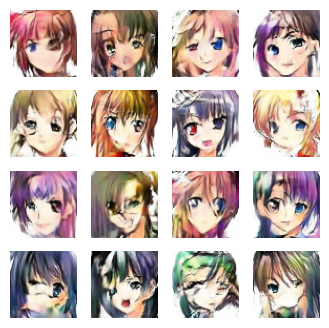

animeGenerated_wgan_220epochs


Output of the calculating FID command:
FID:  51.057283831792176

FID_scores:  [310.89644913766426, 113.86022960251154, 76.65208839156367, 57.4473120630131, 49.230976734964116, 46.03839083967449, 41.75931670273431, 39.86533789204478, 38.6269483063931, 35.71037020601801, 36.51144623933607, 36.32309230376967, 34.02147786293958, 32.93571822724115, 34.216103419826624, 33.082243710351804, 32.59043386167457, 33.733076056643796, 34.852104707107685, 36.65853997190007, 44.45719450731241, 48.063358537923136, 51.057283831792176]
[310.89644914 113.8602296   76.65208839  57.44731206  49.23097673
  46.03839084  41.7593167   39.86533789  38.62694831  35.71037021
  36.51144624  36.3230923   34.02147786  32.93571823  34.21610342
  33.08224371  32.59043386  33.73307606  34.85210471  36.65853997
  44.45719451  48.06335854  51.05728383]


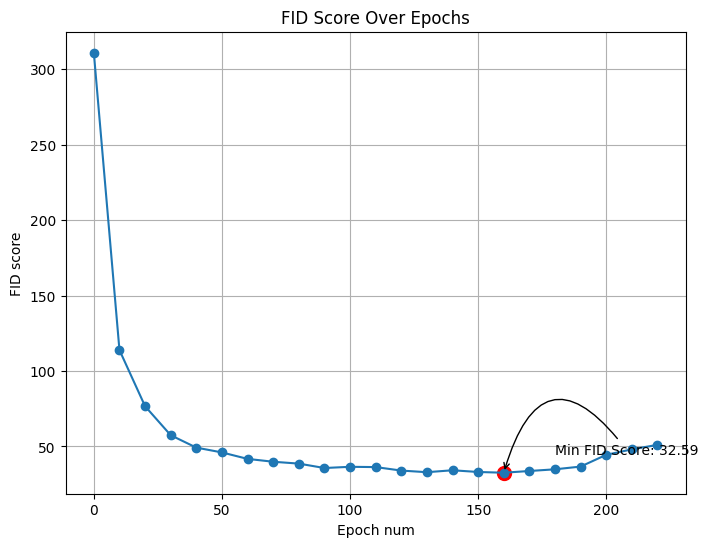

237/237 [==============================] - 49s 206ms/step - d_loss: -1.2443 - g_loss: -20.5225
Epoch 222/802
237/237 [==============================] - 32s 136ms/step - d_loss: -0.9743 - g_loss: 117.3786
Epoch 223/802
237/237 [==============================] - 32s 136ms/step - d_loss: -0.9324 - g_loss: 123.1620
Epoch 224/802
237/237 [==============================] - 32s 136ms/step - d_loss: -1.4021 - g_loss: 52.0589
Epoch 225/802
237/237 [==============================] - 32s 136ms/step - d_loss: -0.7464 - g_loss: -56.3093
Epoch 226/802
237/237 [==============================] - 32s 136ms/step - d_loss: -0.3564 - g_loss: -81.6428
Epoch 227/802
237/237 [==============================] - 32s 136ms/step - d_loss: -0.4671 - g_loss: -66.3630
Epoch 228/802
237/237 [==============================] - 32s 136ms/step - d_loss: -0.2581 - g_loss: 98.4924
Epoch 229/802
237/237 [==============================] - 32s 136ms/step - d_loss: -0.4859 - g_loss: 43.9358
Epoch 230/802
237/237 [=============

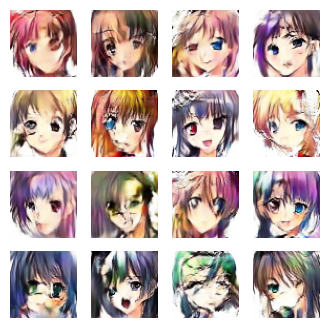

animeGenerated_wgan_230epochs


Output of the calculating FID command:
FID:  61.174642124623375

FID_scores:  [310.89644913766426, 113.86022960251154, 76.65208839156367, 57.4473120630131, 49.230976734964116, 46.03839083967449, 41.75931670273431, 39.86533789204478, 38.6269483063931, 35.71037020601801, 36.51144623933607, 36.32309230376967, 34.02147786293958, 32.93571822724115, 34.216103419826624, 33.082243710351804, 32.59043386167457, 33.733076056643796, 34.852104707107685, 36.65853997190007, 44.45719450731241, 48.063358537923136, 51.057283831792176, 61.174642124623375]
[310.89644914 113.8602296   76.65208839  57.44731206  49.23097673
  46.03839084  41.7593167   39.86533789  38.62694831  35.71037021
  36.51144624  36.3230923   34.02147786  32.93571823  34.21610342
  33.08224371  32.59043386  33.73307606  34.85210471  36.65853997
  44.45719451  48.06335854  51.05728383  61.17464212]


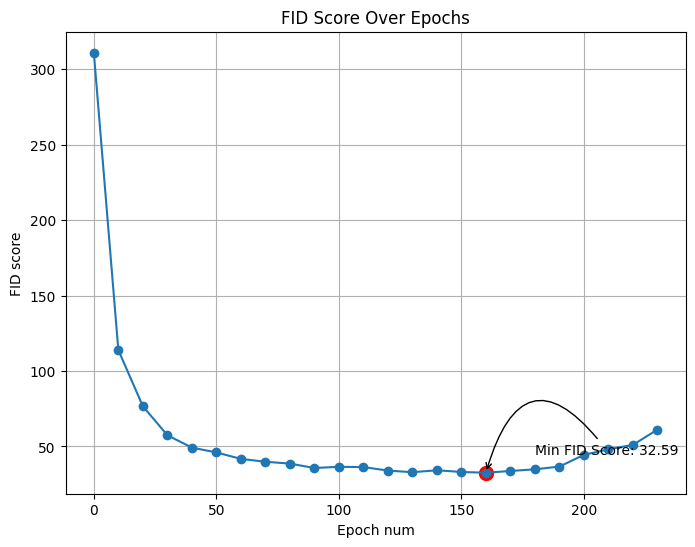

237/237 [==============================] - 49s 209ms/step - d_loss: -0.9496 - g_loss: -58.2608
Epoch 232/802
237/237 [==============================] - 32s 136ms/step - d_loss: -1.1286 - g_loss: -57.7055
Epoch 233/802
237/237 [==============================] - 32s 136ms/step - d_loss: -1.3701 - g_loss: 106.0326
Epoch 234/802
237/237 [==============================] - 32s 136ms/step - d_loss: -0.8391 - g_loss: 160.2243
Epoch 235/802
237/237 [==============================] - 32s 136ms/step - d_loss: 0.1267 - g_loss: 132.5851
Epoch 236/802
237/237 [==============================] - 32s 136ms/step - d_loss: -0.7912 - g_loss: 104.6098
Epoch 237/802
231/237 [============================>.] - ETA: 0s - d_loss: -1.0801 - g_loss: 167.6600

In [ ]:
NUM_EPOCHS = 802 # number of epochs
wgan_gp.fit(train_images, epochs=NUM_EPOCHS, callbacks=[GANMonitor(num_img=16, latent_dim=LATENT_DIM)])

In [ ]:
!unzip /content/drive/MyDrive/anime_last_3000.zip -d ./

In [ ]:
FID_scores_last = []
for i in range(0,len(FID_scores)*10,10):
  folder_name = "animeGenerated_wgan_" + str(i) + "epochs"
  print(folder_name)


  # Construct the command to run
  cmd = f"python -m pytorch_fid /content/anime_last_3000 /content/{folder_name}"

  # Print the captured output
  try:
    output = subprocess.check_output(cmd, shell=True, text=True)
    print(f"Output of the calculating FID command:\n{output}")
    fid_val = float(lastWord(output))
    FID_scores_last.append(fid_val)
    print("FID_scores_last: ",FID_scores_last)
    # Display the current plot
    if i >=360 :  # only display when the FID_scores size > 10
      # Create sample data
      epochs = np.arange(0, len(FID_scores_last)*10, 10)  # Values from 0 with a step of 10
      fid_scores = np.array(FID_scores_last)
      print(fid_scores)
      # Find the minimum FID score and its corresponding epoch
      min_fid_score = min(fid_scores)
      min_fid_epoch = epochs[fid_scores.argmin()]
      # Create the plot
      plt.figure(figsize=(8, 6))
      plt.plot(epochs, fid_scores, marker='o', linestyle='-')
      plt.title('FID Score Over Epochs')
      plt.xlabel('Epoch num')
      plt.ylabel('FID score')
      plt.grid(True)
      # Annotate the minimum point with a rotated text and a straight arrow
      arrow_props = dict(arrowstyle='->', connectionstyle='arc3,rad=1')
      plt.annotate(f'Min FID Score: {min_fid_score:.2f}', xy=(min_fid_epoch, min_fid_score), xytext=(min_fid_epoch + 20, min_fid_score + 10.1),
                  arrowprops=arrow_props, rotation=0, va='bottom')
      # Highlight the minimum point with a red dot
      plt.scatter(min_fid_epoch, min_fid_score, color='red', s=100, label='Min FID Score')
      # Display the plot
      plt.show()

  except subprocess.CalledProcessError as e:
    # Handle any errors that may occur during command execution
    print(f"Error running command: {e}")


In [ ]:
!zip -r /content/drive/MyDrive/generator_38.zip /content/generator